<a href="https://colab.research.google.com/github/PrusTalbot/PrusTalbot/blob/main/%D0%9E%D1%82%D0%B2%D0%B5%D1%82%D1%8B.%20%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85%20%D1%80%D1%8F%D0%B4%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ПРЕДИКТИВНЫЙ АНАЛИЗЮ ВРЕМЕННЫЕ РЯДЫ**

**ОТВЕТЫ**

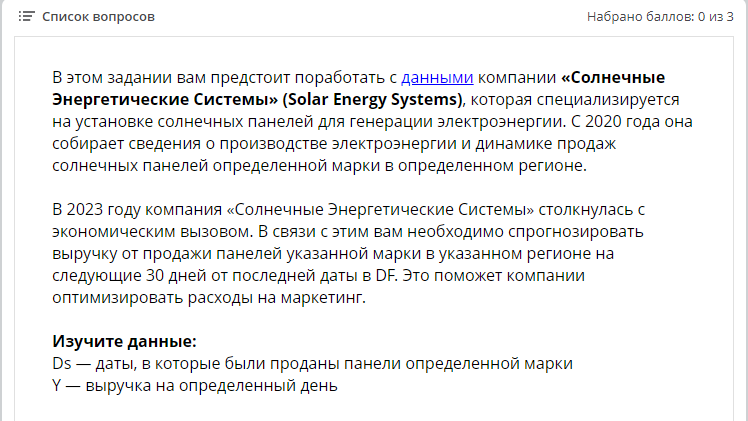

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from prophet import Prophet
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Солнечные Энергетические Системы - Sheet1.csv to Солнечные Энергетические Системы - Sheet1.csv


In [3]:
df = pd.read_csv('Солнечные Энергетические Системы - Sheet1.csv')

In [4]:
df.head()

,ds,y
0,2020-01-01,1000.000000
1,2020-01-02,1012.292949
2,2020-01-03,1018.516660
3,2020-01-04,1017.043132
4,2020-01-05,1011.788132


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      1461 non-null   object 
 1   y       1461 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.0+ KB


In [6]:
df['ds'].unique()

array(['2020-01-01', '2020-01-02', '2020-01-03', ..., '2023-12-29',
       '2023-12-30', '2023-12-31'], dtype=object)

In [7]:
df['y'].unique()

array([1000.       , 1012.292949 , 1018.51666  , ...,  705.3609257,
        697.1595402,  686.3406545])

In [8]:
df['ds']=pd.to_datetime(df['ds'], yearfirst=True)

In [22]:
df

,ds,y
0,2020-01-01,1000.000000
1,2020-01-02,1012.292949
2,2020-01-03,1018.516660
3,2020-01-04,1017.043132
4,2020-01-05,1011.788132
...,...,...
1456,2023-12-27,702.577693
1457,2023-12-28,706.734992
1458,2023-12-29,705.360926
1459,2023-12-30,697.159540


In [10]:
fig=px.line(df, x='ds', y='y', title='Продажи на каждый день') # Строим крафик зависимости одной переменной от дугой. Если несколько переменных, то y=['n1','n2','...']
fig.show()

ПРОВЕРКА НА СТАЦИОНАРНОСТЬ

Чему равен p-value/ Ответ округлите до сотых

In [13]:
time_series=df['y']
result=adfuller(time_series)

print('p-value: %.2f' % result[1])

if result[1]<=0.05:
  print('Временной ряд стационарен')
else:
  print('Временной ряд НЕстационарен')

p-value: 0.96
Временной ряд НЕстационарен


In [14]:
index=int(df.shape[0]*0.3)  # Разложили по пропорции 70/30
train, test=df[:-index],df[-index:]

In [15]:
model=Prophet()
model.fit(train) # Передаем обучающие данные (train) в метод Prophet

predictions_period=model.make_future_dataframe(periods=index) # Задаем (index) в качестве длительности нашего прогноза
predictions_period=predictions_period[-index:]

int_forecast=model.predict(predictions_period)  # Датафрейм, с данными нашего прогноза
int_forecast[['ds','yhat','yhat_lower','yhat_upper']] # Берем только интересующие нас данные, т.к. массив огромен (дата, значение, нижняя граница, верхняя граница)

mse=mean_squared_error(test['y'], int_forecast['yhat'])#  Считаем mse и передаем в метод реальное значение (test['y')] и пронозное  (int_forecast['yhat'])
r2=r2_score(test['y'], int_forecast['yhat'])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6o4i__61/swr_w_3l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6o4i__61/29i1q9fv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7510', 'data', 'file=/tmp/tmp6o4i__61/swr_w_3l.json', 'init=/tmp/tmp6o4i__61/29i1q9fv.json', 'output', 'file=/tmp/tmp6o4i__61/prophet_modelzg1afmjs/prophet_model-20231201101955.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:19:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:19:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [16]:
r2

0.877139149381828

In [17]:
mse

206.7214336550109

In [24]:
model=Prophet()
model.fit(df)

predictions_period=model.make_future_dataframe(periods=30)

forecast=model.predict(predictions_period)
forecast[['ds','yhat','yhat_lower','yhat_upper']]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6o4i__61/zptl_9y2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6o4i__61/5hwtwjag.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73153', 'data', 'file=/tmp/tmp6o4i__61/zptl_9y2.json', 'init=/tmp/tmp6o4i__61/5hwtwjag.json', 'output', 'file=/tmp/tmp6o4i__61/prophet_modelh2wopkwy/prophet_model-20231201102951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:29:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:29:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
0,2022-10-20,771.481370,754.293528,789.834748
1,2022-10-21,773.423219,755.550442,792.808468
2,2022-10-22,768.060113,748.917573,785.515305
3,2022-10-23,759.465027,741.353539,777.409207
4,2022-10-24,754.170719,736.460709,773.137121
...,...,...,...,...
433,2023-12-27,705.905592,687.797885,723.580084
434,2023-12-28,714.031617,695.190201,732.632485
435,2023-12-29,716.317221,697.868744,734.161532
436,2023-12-30,711.229028,692.221805,729.970127


In [25]:
print(forecast)

             ds        trend  yhat_lower   yhat_upper  trend_lower  \
0    2020-01-01  1001.286106  985.263865  1022.438462  1001.286106   
1    2020-01-02  1001.078017  996.054394  1030.397557  1001.078017   
2    2020-01-03  1000.869928  995.383552  1031.329014  1000.869928   
3    2020-01-04  1000.661839  990.897160  1027.243081  1000.661839   
4    2020-01-05  1000.453750  981.534701  1018.778275  1000.453750   
...         ...          ...         ...          ...          ...   
1486 2024-01-26   702.899230  704.313845   743.215351   702.897499   
1487 2024-01-27   702.699399  702.868815   736.977485   702.697312   
1488 2024-01-28   702.499568  693.252431   729.886126   702.497148   
1489 2024-01-29   702.299736  688.899529   724.959269   702.296810   
1490 2024-01-30   702.099905  691.047840   726.549697   702.096691   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0     1001.286106        2.920185              2.920185              2.920185 

In [26]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-01,1004.206290,985.263865,1022.438462
1,2020-01-02,1012.149062,996.054394,1030.397557
2,2020-01-03,1014.163472,995.383552,1031.329014
3,2020-01-04,1008.800236,990.897160,1027.243081
4,2020-01-05,1000.139116,981.534701,1018.778275
...,...,...,...,...
1486,2024-01-26,724.334843,704.313845,743.215351
1487,2024-01-27,719.355019,702.868815,736.977485
1488,2024-01-28,711.110048,693.252431,729.886126
1489,2024-01-29,706.232584,688.899529,724.959269
